Install Requirements

In [1]:
%pip install gdown
import gdown

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Download dataset

In [29]:
download_link = 'https://drive.google.com/u/0/uc?id=1owRpmEzXdShPq1erPD_QTTXRatEaR_MZ&export=download'
# download to dataset folder

gdown.download(download_link, quiet=False)

download_link = 'https://drive.google.com/u/0/uc?id=1aX2HY1JF9iOS_bn4d8vilh-FwtQSTBxZ&export=download'
# download to dataset folder
gdown.download(download_link, quiet=False)

download_link = 'https://drive.google.com/u/0/uc?id=1KPqhqt9NVvk8dAjdXDkr4B4LbcJgyO81&export=download'
# download to dataset folder
gdown.download(download_link, quiet=False)

# unzip dataset
#!unzip -q dataset.zip

# remove zip file
#!rm dataset.zip

# Path: train_yolo.ipynb

Downloading...
From: https://drive.google.com/u/0/uc?id=1owRpmEzXdShPq1erPD_QTTXRatEaR_MZ&export=download
To: /content/FinnForest3.0.tar.gz
100%|██████████| 361M/361M [00:01<00:00, 275MB/s]
Downloading...
From: https://drive.google.com/u/0/uc?id=1aX2HY1JF9iOS_bn4d8vilh-FwtQSTBxZ&export=download
To: /content/scripts.zip
100%|██████████| 5.84k/5.84k [00:00<00:00, 3.83MB/s]
Downloading...
From: https://drive.google.com/u/0/uc?id=1KPqhqt9NVvk8dAjdXDkr4B4LbcJgyO81&export=download
To: /content/parkswidnica.zip
100%|██████████| 49.1M/49.1M [00:01<00:00, 28.0MB/s]


'parkswidnica.zip'

In [30]:
!mkdir dataset

# un tar gz dataset
!tar -xvzf FinnForest3.0.tar.gz

!mkdir -p dataset/train/images
!mkdir -p dataset/valid/images
!mkdir -p dataset/train/labels
!mkdir -p dataset/valid/labels


# move dataset to datasets folder
# !mv FinnForest3.0/rgb/train/* dataset/train/images/
# !mv FinnForest3.0/rgb/val/* dataset/valid/images/


!mv FinnForest3.0/train.json dataset/train/
!mv FinnForest3.0/val.json dataset/valid/

# remove tar gz file
#!rm FinnForest3.0.tar.gz

# unzip dataset
!unzip -q scripts.zip

# remove zip file
!rm scripts.zip

# unzip dataset
!unzip -q parkswidnica.zip

# remove zip file
!rm parkswidnica.zip

mkdir: cannot create directory ‘dataset’: File exists
FinnForest3.0/annotations/train/forest_2ch_panoptic/00012.png
FinnForest3.0/annotations/train/forest_2ch_panoptic/00109.png
FinnForest3.0/rgb/train/00018.jpg
FinnForest3.0/annotations/train/forest_2ch_panoptic/00073.png
FinnForest3.0/annotations/train/depth_proj/00034.png
FinnForest3.0/preds_depth_full_r/142_preds_rgb.png
FinnForest3.0/rgb/val/00110.jpg
FinnForest3.0/annotations/val/depth/00129.png
FinnForest3.0/annotations/train/depth_proj/00095.png
FinnForest3.0/rgb/train/00079.jpg
FinnForest3.0/annotations/train/depth/00058.png
FinnForest3.0/preds_depth_full/134_preds_depth.png
FinnForest3.0/annotations/train/forest_coco_panoptic/00108.png
FinnForest3.0/rgb/train/00260.jpg
FinnForest3.0/preds_depth_full_4/149_preds_depth_gray.png
FinnForest3.0/rgb/train/00002.jpg
FinnForest3.0/annotations/train/forest_coco_panoptic/00169.png
FinnForest3.0/annotations/train/semantic/00178.png
FinnForest3.0/annotations/train/semantic/00101.png
Finn

### Clone Upscale Codes and install requirements


In [ ]:
!git clone https://github.com/xinntao/Real-ESRGAN.git
%cd Real-ESRGAN
# Set up the environment
!pip install basicsr
!pip install facexlib
!pip install gfpgan
!pip install -r requirements.txt
!python setup.py develop

### UpScale Train Data

In [ ]:
import os
from google.colab import files
import shutil

TRAIN_SRC_FOLDER = 'FinnForest3.0/rgb/train/'

RESULT_FOLDER = '/content/Real-ESRGAN/results/'

if os.path.isdir(RESULT_FOLDER):
    shutil.rmtree(RESULT_FOLDER)
os.mkdir(RESULT_FOLDER)

!python inference_realesrgan.py -n RealESRNet_x4plus.pth -i {TRAIN_SRC_FOLDER}



!mv {RESULT_FOLDER}* dataset/train/images/

### UpScale Validation Data

In [ ]:
VALID_SRC_FOLDER = 'FinnForest3.0/rgb/val/'

if os.path.isdir(RESULT_FOLDER):
    shutil.rmtree(RESULT_FOLDER)
os.mkdir(RESULT_FOLDER)

!python inference_realesrgan.py -n RealESRNet_x4plus.pth -i {VALID_SRC_FOLDER}
!mv {RESULT_FOLDER}* dataset/valid/images/


In [4]:
# install dependencies

%pip install -r requirements.txt  # install dependencies

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 561.4/561.4 kB 39.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.5/199.5 kB 25.5 MB/s eta 0:00:00


## Convert coco dataset to yolo dataset

In [31]:
!python coco2yolo.py --json_file dataset/train/train.json --output_path dataset/train/labels
!python coco2yolo.py --json_file dataset/valid/val.json --output_path dataset/valid/labels

!rm -rf FinnForest3.0
!rm dataset/valid/val.json
!rm dataset/train/train.json




ekstraksi dari json : dataset/train/train.json
Annotation txt for each iamge:   0% 0/250 [00:00<?, ?it/s]checking : 00183.jpg and copying images to output path
that images contains class: 24 objects
checking : 00277.jpg and copying images to output path
that images contains class: 10 objects
checking : 00220.jpg and copying images to output path
that images contains class: 17 objects
checking : 00289.jpg and copying images to output path
that images contains class: 5 objects
checking : 00234.jpg and copying images to output path
that images contains class: 16 objects
checking : 00232.jpg and copying images to output path
that images contains class: 16 objects
checking : 00196.jpg and copying images to output path
that images contains class: 21 objects
checking : 00056.jpg and copying images to output path
that images contains class: 11 objects
checking : 00079.jpg and copying images to output path
that images contains class: 13 objects
checking : 00059.jpg and copying images to output 

### Create data.yml file

Training with yolo need to have the following parameters

In [32]:
import yaml
import os 

train_images_path = os.path.abspath('dataset/train/images')
valid_images_path = os.path.abspath('dataset/valid/images')
with open('dataset/train/labels/_darknet.labels.txt') as f:
    classes = f.read().splitlines()

print(classes)

with open('dataset/data.yaml', 'w') as outfile:
    yaml.dump({'nc': len(classes), 'names': classes, 'train': train_images_path, 'val':valid_images_path}, outfile, default_flow_style=False)

!cat dataset/data.yaml



['Lake', 'Obstacle', 'Ground', 'Track', 'Tree', 'Spruce', 'Birch', 'Pine']
names:
- Lake
- Obstacle
- Ground
- Track
- Tree
- Spruce
- Birch
- Pine
nc: 8
train: /content/dataset/train/images
val: /content/dataset/valid/images


In [33]:
with open('default_copy.yaml') as file:
    # The FullLoader parameter handles the conversion from YAML
    # scalar values to Python the dictionary format
    data = yaml.load(file, Loader=yaml.FullLoader)

    data['data'] = os.path.abspath('dataset/data.yaml')
    data['model'] = 'yolov8n-seg.pt'
    # there are more than one model for the above weights 
    # yolov8n-seg.pt
    # yolov8s-seg.pt
    # yolov8l-seg.pt
    # yolov8m-seg.pt
    # yolov8x-seg.pt
    data['imgsz'] = 640
    data['batch'] = -1
    data['epochs'] = 250
    data['device'] = 0


with open('default.yaml', 'w') as file:
    documents = yaml.dump(data, file)


**YOU Can change and use other options in the default_copy.yaml file All of them has description**

**MAKE SURE YOU GET BACKUP FROM THE default_copy.yaml FILE BEFORE CHANGING THE FILE**

# Train a model


In [35]:
# train model  dataset/data.yaml

#!yolo segment train data=coco128-seg.yaml cfg=default.yaml
!yolo segment train cfg=default.yaml

Overriding /usr/local/lib/python3.10/dist-packages/ultralytics/yolo/cfg/default.yaml with default.yaml
Ultralytics YOLOv8.0.89 🚀 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=segment, mode=train, model=yolov8n-seg.pt, data=/content/dataset/data.yaml, epochs=250, patience=50, batch=-1, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, box

It will generate results and weights in the following directions

bash
'runs/segment/train{ID}'


In [36]:
# inference

!yolo segment predict model=/content/runs/segment/train2/weights/best.pt source='dataset/valid/images/00110.jpg' save_txt=True # predict with official model


# NOTE: if you set save_txt True it will save the prediction in the same folder as the image with the same name but with .txt extension

Ultralytics YOLOv8.0.89 🚀 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-seg summary (fused): 195 layers, 3259624 parameters, 0 gradients, 12.0 GFLOPs

image 1/1 /content/dataset/valid/images/00110.jpg: 384x640 1 Ground, 10 Spruces, 1 Birch, 102.9ms
Speed: 2.0ms preprocess, 102.9ms inference, 106.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/segment/predict9
1 label saved to runs/segment/predict9/labels


In [37]:
!yolo segment predict model=runs/segment/train2/weights/best.pt source='dataset/valid/images/' save_txt=True # predict with official model

Ultralytics YOLOv8.0.89 🚀 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-seg summary (fused): 195 layers, 3259624 parameters, 0 gradients, 12.0 GFLOPs

image 1/50 /content/dataset/valid/images/00110.jpg: 384x640 1 Ground, 10 Spruces, 1 Birch, 65.3ms
image 2/50 /content/dataset/valid/images/00111.jpg: 384x640 1 Ground, 11 Spruces, 7.4ms
image 3/50 /content/dataset/valid/images/00112.jpg: 384x640 1 Ground, 15 Spruces, 2 Birchs, 7.2ms
image 4/50 /content/dataset/valid/images/00113.jpg: 384x640 1 Ground, 11 Spruces, 7.2ms
image 5/50 /content/dataset/valid/images/00114.jpg: 384x640 1 Ground, 10 Spruces, 3 Birchs, 7.0ms
image 6/50 /content/dataset/valid/images/00115.jpg: 384x640 1 Ground, 14 Spruces, 1 Birch, 6.9ms
image 7/50 /content/dataset/valid/images/00116.jpg: 384x640 1 Ground, 12 Spruces, 1 Birch, 6.9ms
image 8/50 /content/dataset/valid/images/00117.jpg: 384x640 1 Ground, 10 Spruces, 6.9ms
image 9/50 /content/dataset/valid/images/00118.jpg: 384x640 1 Ground, 11 S

In [38]:
!yolo segment predict model=runs/segment/train2/weights/best.pt source='/content/drzewa' save_txt=True # predict with official model

Ultralytics YOLOv8.0.89 🚀 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-seg summary (fused): 195 layers, 3259624 parameters, 0 gradients, 12.0 GFLOPs

image 1/10 /content/drzewa/IMG_0577.jpg: 480x640 3 Pines, 67.8ms
image 2/10 /content/drzewa/IMG_0578.jpg: 480x640 1 Ground, 2 Birchs, 7.6ms
image 3/10 /content/drzewa/IMG_0579.jpg: 480x640 1 Ground, 1 Spruce, 1 Birch, 1 Pine, 7.6ms
image 4/10 /content/drzewa/IMG_0645.jpg: 480x640 1 Ground, 1 Spruce, 1 Birch, 7.6ms
image 5/10 /content/drzewa/IMG_0686.jpg: 480x640 1 Ground, 2 Spruces, 9.7ms
image 6/10 /content/drzewa/IMG_0687.jpg: 480x640 1 Ground, 1 Spruce, 9.7ms
image 7/10 /content/drzewa/IMG_0689.jpg: 480x640 1 Spruce, 1 Birch, 12.8ms
image 8/10 /content/drzewa/IMG_0690.jpg: 480x640 1 Ground, 1 Pine, 8.5ms
image 9/10 /content/drzewa/IMG_0700.jpg: 480x640 1 Ground, 13.1ms
image 10/10 /content/drzewa/IMG_0751.jpg: 480x640 1 Spruce, 4 Birchs, 7.6ms
Speed: 3.4ms preprocess, 15.2ms inference, 10.3ms postprocess per ima

# Inference for folders

In [39]:
from ultralytics import YOLO


# We should use the same model as the one we used for training
model = YOLO('/content/runs/segment/train2/weights/best.pt')  # Change the path with your trained path
image_path = 'dataset/valid/images/00111.jpg'
model.predict(image_path) # Change the path with your image path


# this will show the image with the prediction
# NOTE: if you set save_txt True it will save the prediction in the same folder as the image with the same name but with .txt extension

model.predict(image_path, save_txt=True, save=True) # Change the path with your image path

model.predict(image_path, save_txt=True, save_conf=True, save=True) # Change the path with your image path



image 1/1 /content/dataset/valid/images/00111.jpg: 384x640 1 Ground, 11 Spruces, 11.2ms
Speed: 1.9ms preprocess, 11.2ms inference, 2.8ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/dataset/valid/images/00111.jpg: 384x640 1 Ground, 11 Spruces, 8.6ms
Speed: 1.7ms preprocess, 8.6ms inference, 2.9ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/segment/predict12
1 label saved to runs/segment/predict12/labels

image 1/1 /content/dataset/valid/images/00111.jpg: 384x640 1 Ground, 11 Spruces, 8.9ms
Speed: 2.0ms preprocess, 8.9ms inference, 2.8ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/segment/predict12
1 label saved to runs/segment/predict12/labels


[ultralytics.yolo.engine.results.Results object with attributes:
 
 boxes: ultralytics.yolo.engine.results.Boxes object
 keypoints: None
 keys: ['boxes', 'masks']
 masks: ultralytics.yolo.engine.results.Masks object
 names: {0: 'Lake', 1: 'Obstacle', 2: 'Ground', 3: 'Track', 4: 'Tree', 5: 'Spruce', 6: 'Birch', 7: 'Pine'}
 orig_img: array([[[ 39,  18,  21],
         [ 39,  18,  20],
         [ 37,  19,  20],
         ...,
         [ 41,  39,  38],
         [ 42,  38,  37],
         [ 41,  37,  36]],
 
        [[ 32,  13,  16],
         [ 35,  17,  18],
         [ 35,  17,  16],
         ...,
         [ 41,  39,  38],
         [ 42,  38,  37],
         [ 42,  38,  37]],
 
        [[ 34,  18,  19],
         [ 33,  18,  16],
         [ 34,  16,  15],
         ...,
         [ 38,  36,  35],
         [ 38,  36,  35],
         [ 39,  37,  36]],
 
        ...,
 
        [[159, 111,  77],
         [159, 111,  77],
         [159, 111,  77],
         ...,
         [102,  69,  54],
         [ 99, 

# You may also need to predict all of the folder

In [40]:
folder_path = 'dataset/valid/images/'

model.predict(folder_path) # You can use the above command to this too


image 1/50 /content/dataset/valid/images/00110.jpg: 384x640 1 Ground, 10 Spruces, 1 Birch, 7.5ms
image 2/50 /content/dataset/valid/images/00111.jpg: 384x640 1 Ground, 11 Spruces, 7.2ms
image 3/50 /content/dataset/valid/images/00112.jpg: 384x640 1 Ground, 15 Spruces, 2 Birchs, 7.1ms
image 4/50 /content/dataset/valid/images/00113.jpg: 384x640 1 Ground, 11 Spruces, 7.2ms
image 5/50 /content/dataset/valid/images/00114.jpg: 384x640 1 Ground, 10 Spruces, 3 Birchs, 8.1ms
image 6/50 /content/dataset/valid/images/00115.jpg: 384x640 1 Ground, 14 Spruces, 1 Birch, 7.1ms
image 7/50 /content/dataset/valid/images/00116.jpg: 384x640 1 Ground, 12 Spruces, 1 Birch, 7.0ms
image 8/50 /content/dataset/valid/images/00117.jpg: 384x640 1 Ground, 10 Spruces, 7.0ms
image 9/50 /content/dataset/valid/images/00118.jpg: 384x640 1 Ground, 11 Spruces, 7.2ms
image 10/50 /content/dataset/valid/images/00119.jpg: 384x640 1 Ground, 11 Spruces, 7.1ms
image 11/50 /content/dataset/valid/images/00120.jpg: 384x640 1 Ground, 

[ultralytics.yolo.engine.results.Results object with attributes:
 
 boxes: ultralytics.yolo.engine.results.Boxes object
 keypoints: None
 keys: ['boxes', 'masks']
 masks: ultralytics.yolo.engine.results.Masks object
 names: {0: 'Lake', 1: 'Obstacle', 2: 'Ground', 3: 'Track', 4: 'Tree', 5: 'Spruce', 6: 'Birch', 7: 'Pine'}
 orig_img: array([[[ 21,  16,  18],
         [ 23,  18,  20],
         [ 25,  19,  20],
         ...,
         [ 42,  40,  39],
         [ 41,  39,  38],
         [ 40,  38,  37]],
 
        [[ 20,  15,  17],
         [ 21,  16,  18],
         [ 23,  17,  18],
         ...,
         [ 41,  39,  38],
         [ 40,  38,  37],
         [ 38,  36,  35]],
 
        [[ 20,  15,  16],
         [ 20,  15,  16],
         [ 22,  16,  17],
         ...,
         [ 40,  38,  37],
         [ 38,  36,  35],
         [ 37,  35,  34]],
 
        ...,
 
        [[163, 117,  83],
         [158, 112,  78],
         [150, 104,  70],
         ...,
         [133,  91,  72],
         [133, 

# Validation


In [41]:
model.val() # This will show the validation results no arg needed
metrics = model.val()  # no arguments needed, dataset and settings remembered
metrics.box.map    # map50-95(B)
metrics.box.map50  # map50(B)
metrics.box.map75  # map75(B)
metrics.box.maps   # a list contains map50-95(B) of each category
metrics.seg.map    # map50-95(M)
metrics.seg.map50  # map50(M)
metrics.seg.map75  # map75(M)
metrics.seg.maps   # a list contains map50-95(M) of each category


# It will save the result on the runs/segment/val{val_number}/ folder


Ultralytics YOLOv8.0.89 🚀 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
val: Scanning /content/dataset/valid/labels.cache... 50 images, 0 backgrounds, 0 corrupt: 100%|██████████| 50/50 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:06<00:00,  1.63s/it]
                   all         50        762      0.816      0.834      0.841      0.508      0.809      0.826      0.826      0.501
                Ground         50         50      0.891          1      0.995      0.681      0.892          1      0.995      0.677
                Spruce         50        712       0.74      0.669      0.687      0.334      0.725      0.651      0.657      0.325
Speed: 7.4ms preprocess, 6.8ms inference, 0.0ms loss, 7.9ms postprocess per image
Results saved to runs/segment/val3
Ultralytics YOLOv8.0.89 🚀 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)


array([    0.50078,     0.50078,     0.67696,     0.50078,     0.50078,      0.3246,     0.50078,     0.50078])

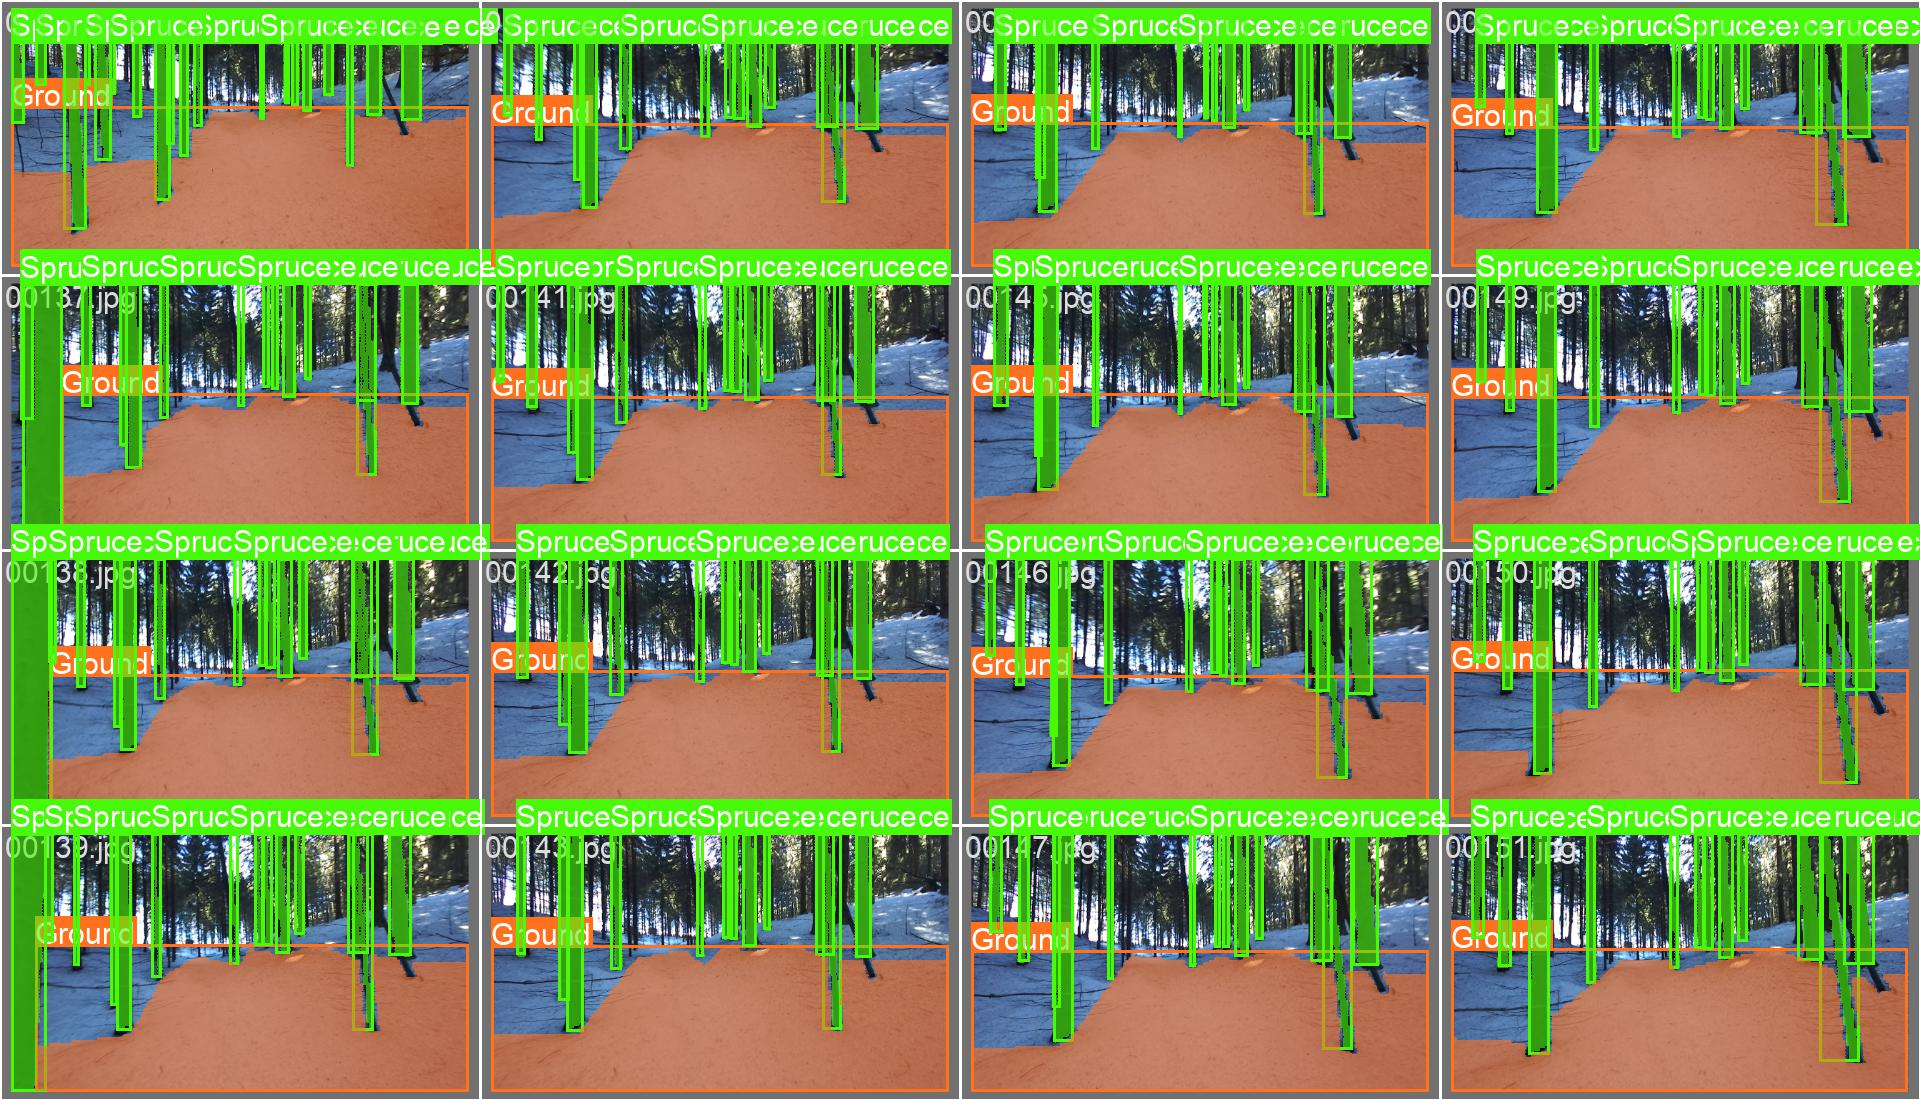

In [15]:
from IPython.display import Image as show_image
show_image(filename="runs/segment/train/val_batch0_labels.jpg")

Here’s how to use the model on new images:

In [16]:
my_model = YOLO('runs/segment/train/weights/best.pt')
results = list(my_model('dataset/valid/images/00110.jpg', conf=0.128))
result = results[0]


image 1/1 /content/dataset/valid/images/00110.jpg: 384x640 1 Ground, 9.7ms
Speed: 0.4ms preprocess, 9.7ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)


In [7]:
!yolo help


    Arguments received: ['yolo', 'help']. Ultralytics 'yolo' commands use the following syntax:

        yolo TASK MODE ARGS

        Where   TASK (optional) is one of ('detect', 'segment', 'classify', 'pose')
                MODE (required) is one of ('train', 'val', 'predict', 'export', 'track', 'benchmark')
                ARGS (optional) are any number of custom 'arg=value' pairs like 'imgsz=320' that override defaults.
                    See all ARGS at https://docs.ultralytics.com/usage/cfg or with 'yolo cfg'

    1. Train a detection model for 10 epochs with an initial learning_rate of 0.01
        yolo train data=coco128.yaml model=yolov8n.pt epochs=10 lr0=0.01

    2. Predict a YouTube video using a pretrained segmentation model at image size 320:
        yolo predict model=yolov8n-seg.pt source='https://youtu.be/Zgi9g1ksQHc' imgsz=320

    3. Val a pretrained detection model at batch-size 1 and image size 640:
        yolo val model=yolov8n.pt data=coco128.yaml batch=1 imgs